# Problem 3

In [11]:
import matplotlib.pyplot as plt
import scipy.optimize as opt

A = [[-3, 1], [1, 2]]
b = [6, 4]
c = [-1, 4]
bounds = [(None, None), (-3, None)]

# Plotting Routine

In [5]:
def line(A,b,i,x):
    return (b[i]-A[i][0]*x)/A[i][1]

def grad(c,g,x):
    return (g-c[0]*x)/c[1]

def MIN(a, b):
    return b if a==None else a if b==None else min(a,b)

def MAX(a, b):
    return b if a==None else a if b==None else max(a,b)

def plot_linopt(A, b, c, bounds, res,
                borders=None, dx=5, dy=5,
                title=None, labels=None,
                solution=None, legend=None, output=False):

    ax=plt.axes()
    ax.grid(True)

    if borders==None:
        borders=[(res.x[0]-dx, res.x[0]+dx),
                 (res.x[1]-dy, res.x[1]+dy)]

    # set drawing region (xmin, xmax) (ymin, ymax)
    xmin = borders[0][0]
    xmax = borders[0][1]
    ymin = borders[1][0]
    ymax = borders[1][1]

    ax.set_xlim((xmin,xmax))
    ax.set_ylim((ymin,ymax))
    if labels!=None:
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])

    if legend==None:
        legend=[]
        for i in range(0, len(A)):
            legend+=['Constraint '+str(i)]

    if solution==None:
        solution='Solution'



    # compute visual bounds (drawing limits if there is no bound)
    xleft = MAX(bounds[0][0], borders[0][0])
    xright = MIN(bounds[0][1], borders[0][1])
    ybottom = MAX(bounds[1][0], borders[1][0])
    ytop = MIN(bounds[1][1], borders[1][1])

    # plot constraints
    x=[xmin,xmax]
    lines=[]
    for i in range(0, len(A)):
        y = [line(A,b,i,xmin), line(A,b,i,xmax)]
        l=plt.plot(x,y,label=legend[i])
        plt.fill_between(x, y, ymin if A[i][1]>0 else ymax, alpha=0.3)
        lines=lines+[l[0]]

    # plot bounding box
    rangex=[xleft, xright, xright, xleft, xleft]
    rangey=[ybottom, ybottom, ytop, ytop, ybottom]
    l=plt.plot(rangex, rangey,label='Bounds')
    plt.fill_between(rangex, rangey, alpha=0.3)
    lines+=[l[0]]

    # plot optimal cost function
    x=[xmin,xmax]
    lopt=plt.plot(x, [grad(c,res.fun,xmin),grad(c,res.fun,xmax)],
                  color='red', label=solution)

    # plot optimal solution
    plt.plot(res.x[0],res.x[1],'ro')

    if legend!=None:
        plt.legend(handles=lines+[lopt[0]])

    if title!=None:
        plt.suptitle(title)

    if output:
        print(solution, '=', res.fun)
        for i in range(0, len(c)):
            print(labels[i],'=',res.x[i])


Optimize margin

In [8]:
res = opt.linprog(c, A, b , bounds= bounds, method="simplex")
res


     con: array([], dtype=float64)
     fun: -22.0
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([3.90000000e+01, 1.77635684e-15])
  status: 0
 success: True
       x: array([10., -3.])

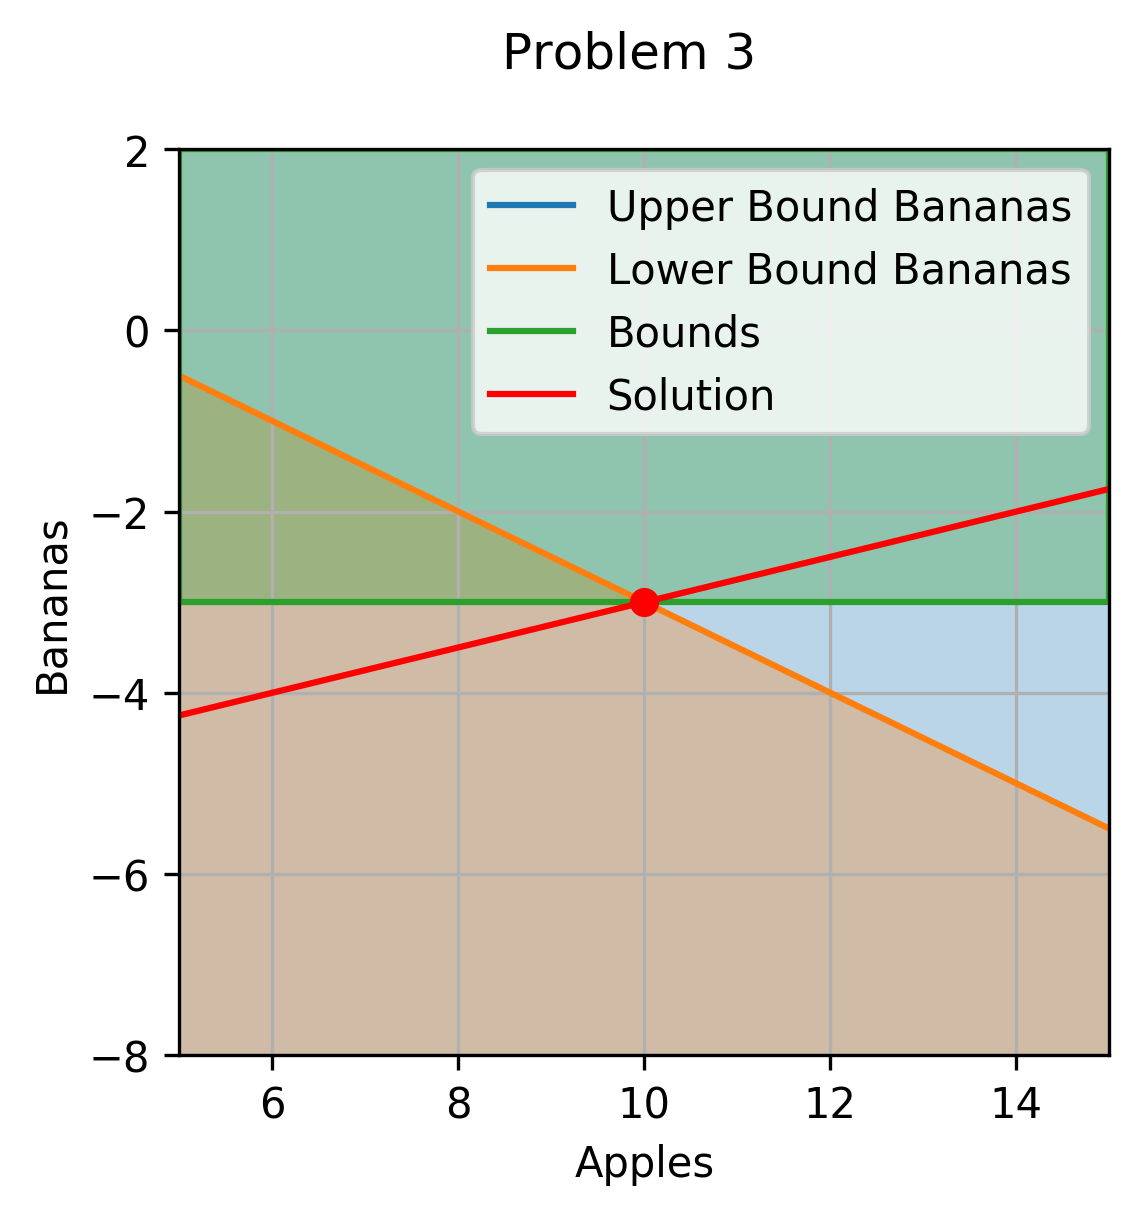

In [12]:
#fig=plt.figure(figsize=(4,4), dpi=300)
plot_linopt(A, b, c, bounds, res,
            title='Problem 3',
            labels=['x1', 'x2'],
            legend=['Eq1',
                    'Eq2'])
